### Sean Wendlandt Assignment 4 4/29/23

In [2]:
# Sean Wendlandt 5/2/23
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#### 1A

In [3]:
delivery_train = pd.read_csv('delivery_time_train_data.csv')
delivery_test = pd.read_csv('delivery_time_test_data.csv')
student_train = pd.read_csv('student_train_data.csv')
student_test = pd.read_csv('student_test_data.csv')

In [4]:
delivery_train.head()

,Miles,Deliveries,Time
0,100,4,9.3
1,50,3,4.8
2,100,4,8.9
3,100,2,6.5
4,50,2,4.2


In [5]:
delivery_test.head()

,Miles,Deliveries,Time
0,50,3,4.6
1,65,2,5.5
2,80,1,6.3
3,70,1,6.2
4,70,5,8.5


In [6]:
student_train.head()

,GPA,Age,Dropped
0,3.78,21,0
1,2.38,27,0
2,3.05,21,1
3,2.19,28,1
4,3.22,23,0


In [7]:
student_test.head()

,GPA,Age,Dropped
0,2.49,26,1
1,2.67,29,0
2,2.86,29,1
3,2.21,26,0
4,2.91,20,1


#### 1B

In [8]:
X_delivery_train = delivery_train[['Miles','Deliveries']]
y_delivery_train = delivery_train['Time']

X_delivery_test = delivery_test[['Miles','Deliveries']]
y_delivery_test = delivery_test['Time']

X_student_train = student_train[['GPA','Age']]
y_student_train = student_train['Dropped']

X_student_test = student_test[['GPA','Age']]
y_student_test = student_test['Dropped']

In [9]:
print(X_delivery_train.shape)
print(y_delivery_train.shape)
print(X_delivery_test.shape)
print(y_delivery_test.shape)
print(X_student_train.shape)
print(y_student_train.shape)
print(X_student_test.shape)
print(y_student_test.shape)

(199, 2)
(199,)
(101, 2)
(101,)
(400, 2)
(400,)
(100, 2)
(100,)


#### 1C

In [10]:
def dist(a,b):
    return np.sqrt( (b[1]-a[1])**2 + (b[0]-a[0])**2)

def knn_predict(X_train,y_train,X_test, k=5):
    y_pred = list()
    for i in range(len(X_test)):
        dist_lst = list()
        for j in range(len(y_train)):
            dist_lst.append(dist(X_test.iloc[i],X_train.iloc[j]))
        temp_df = pd.DataFrame({'Train':y_train,'Dist':dist_lst})
        temp_df.sort_values(by='Dist',inplace=True)
        y_pred.append(np.mean(temp_df['Train'][:k]))
    return y_pred

In [11]:
y_delivery_test_pred = knn_predict(X_delivery_train,y_delivery_train,X_delivery_test)
#print(y_delivery_test_pred)

#### 1D

In [12]:
def mse(actual,pred):
    tot_err = 0
    n = len(actual)
    for i in range(n):
        tot_err += (actual[i] - pred[i])**2
    return tot_err/n

In [13]:
mse(y_delivery_test,y_delivery_test_pred)

1.0977544554455447

#### 1E

In [14]:
y_delivery_train_pred = knn_predict(X_delivery_train,y_delivery_train,X_delivery_train)

In [15]:
mse(y_delivery_train,y_delivery_train_pred)

0.5889105527638189

#### 1F

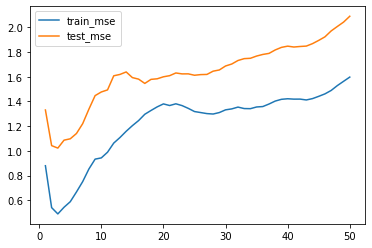

In [15]:
k_vals = [k for k in range(1,51)]
delivery_train_mse = []
delivery_test_mse = []

for k_select in k_vals: 
    delivery_train_mse.append(mse(knn_predict(X_delivery_train, y_delivery_train, X_delivery_train, k = k_select),y_delivery_train))
    delivery_test_mse.append(mse(knn_predict(X_delivery_train, y_delivery_train, X_delivery_test, k = k_select),y_delivery_test))

plt.plot(k_vals, delivery_train_mse, label="train_mse")
plt.plot(k_vals, delivery_test_mse, label="test_mse")
plt.legend()
plt.show()

#### 1G

In [16]:
knr = KNeighborsRegressor()
knr.fit(X_delivery_train,y_delivery_train)
delivery_pred = knr.predict(X_delivery_test)
mean_squared_error(y_delivery_test,delivery_pred)

1.142752475247525

#### 1H

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([('scaler', StandardScaler()), ('KNeighbors', KNeighborsRegressor())])
pipe.fit(X_delivery_train,y_delivery_train)
mean_squared_error(y_delivery_test,pipe.predict(X_delivery_test))

1.0299128712871293

#### 1I

In [18]:
from sklearn.ensemble import RandomForestRegressor
pipe2 = Pipeline([('scaler', StandardScaler()), ('RandomForest', RandomForestRegressor())])
pipe2.fit(X_delivery_train,y_delivery_train)
mean_squared_error(y_delivery_test,pipe2.predict(X_delivery_test))

0.9596311518364858

#### 2A

In [19]:
sc = StandardScaler()
X_student_train_std = sc.fit_transform(X_student_train)
X_student_test_std = sc.transform(X_student_test)

In [20]:
def knn_predict(X_train,y_train,X_test, k=5):
    y_pred = list()
    for i in range(len(X_test)):
        dist_lst = list()
        for j in range(len(y_train)):
            dist_lst.append(dist(X_test[i],X_train[j]))
        temp_df = pd.DataFrame({'Labels':y_train,'Dist':dist_lst})
        temp_df.sort_values(by='Dist',inplace=True)
        y_pred.append(max_index(temp_df.iloc[:20]))
    return y_pred

In [21]:
def max_index(in_df):
    dct = {}
    for val in in_df['Labels'].unique():
        dct[val] = 0
    for i in range(len(in_df)):
        dct[in_df['Labels'].iloc[i]] += 1 
    max_count = 0
    max_ind = 0
    for key in dct.keys():
        if dct[key] > max_count:
            max_count = dct[key]
            max_ind = key
    return(max_ind)

In [22]:
y_student_test_pred = knn_predict(X_student_train_std,
                                  y_student_train,X_student_test_std)

#### 2B

In [23]:
def overall_accuracy(true,pred):
    return list(y_student_test_pred == y_student_test).count(True)/len(true)

overall_accuracy(y_student_test,y_student_test_pred)

0.74

#### 2C

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[1,5,10,20, 30, 40 ,50]}
knr_gs = GridSearchCV(KNeighborsClassifier(),param_grid)
knr_gs.fit(X_student_train_std,y_student_train)
knr_gs.best_params_ #40

knr_opt = KNeighborsClassifier(n_neighbors = 40)
knr_opt.fit(X_student_train_std,y_student_train)
knr_y_pred = knr_opt.predict(X_student_test_std)
knr_opt.score(X_student_test_std,y_student_test)

0.73

#### 2D

In [29]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=2)
forest.fit(X_student_train_std,y_student_train)
forest.score(X_student_test_std,y_student_test)

0.77

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=2)
forest.fit(X_student_train,y_student_train)
forest.score(X_student_test,y_student_test)

0.77